# Summary

* Extracted verbs from two structural representations of Mandarin passives and causatives constructions using NLTK and SpaCy.



# Background

* Passive sentences (a.k.a. BEI-constructions) in Mandarin contain the passive morpheme '被'. 

* Causative sentences (a.k.a. BA-constructions) in Mandarin contain the causative morpheme '把'. 

# NLTK

In [ ]:
import nltk
nltk.download('sinica_treebank') # https://www.kaggle.com/datasets/nltkdata/sinica-treebank
from nltk.corpus import sinica_treebank

[nltk_data] Downloading package sinica_treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/sinica_treebank.zip.


## A Failed Attempt


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

In [ ]:
for sent in sinica_treebank.sents()[:500]:
    if '把' in sent or '被' in sent:
        print(pos_tag(sent))

[('這種', 'JJ'), ('情景', 'NNP'), ('把', 'NNP'), ('我', 'NNP'), ('嚇壞', 'NNP'), ('了', 'NN')]
[('於是', 'JJ'), ('人們', 'NNP'), ('把', 'NNP'), ('文字', 'NNP'), ('寫', 'NNP'), ('在', 'NNP'), ('絲', 'NNP'), ('上', 'NN')]
[('作者', 'JJ'), ('把', 'NNP'), ('文章', 'NNP'), ('送', 'NNP'), ('到', 'NNP'), ('印刷廠', 'NN')]
[('你', 'JJ'), ('就', 'NNP'), ('先', 'NNP'), ('把', 'NNP'), ('蘋果', 'NNP'), ('送給', 'NNP'), ('她', 'NN')]
[('老人', 'JJ'), ('被', 'NNP'), ('大福', 'NNP'), ('的', 'NNP'), ('孝心', 'NNP'), ('感動', 'NN')]
[('叫', 'JJ'), ('他', 'NNP'), ('把', 'NNP'), ('金丸', 'NNP'), ('丟進', 'NNP'), ('山泉', 'NNP'), ('裡', 'NN')]
[('便', 'JJ'), ('把', 'NNP'), ('這個', 'NNP'), ('溫泉', 'NNP'), ('命名為', 'NNP'), ('孝子泉', 'NN')]
[('才', 'JJ'), ('知道', 'NNP'), ('嬸嬸', 'NNP'), ('被', 'NNP'), ('車子', 'NNP'), ('撞傷', 'NNP'), ('了', 'NN')]


## A Structural Approach

* In sinica_treebank both '被' and '把' are analyzed as a preposition that heads a PP.

* The verb in a passive or causative construction is contained in a verb cluster that is sister to the PP headed by '被' or '把'.

* A passive or causative construction may be deeply embedded.

In [ ]:
import nltk.corpus.reader # for reading parsed_sents as trees

In [ ]:
# for displaying trees
!pip3 install svgling
import svgling
from IPython.display import display

448
(S
  (NP (Nab 老人))
  (PP (P02 被) (NP (N‧的 (Nba 大福) (DE 的)) (Nad 孝心)))
  (VH22 感動))


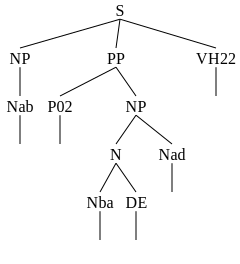

In [ ]:
for sent_index, sent in enumerate(sinica_treebank.sents()):
    if '被' in sent:
        tree = sinica_treebank.parsed_sents()[sent_index]
        print(sent_index)
        print(tree)
        display(tree)
        break

23
(S (NP (DM 這種) (Nad 情景)) (PP (P07 把) (NP (Nhaa 我))) (VH22 嚇壞) (Ta 了))


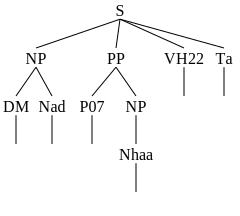

In [ ]:
for sent_index, sent in enumerate(sinica_treebank.sents()):
    if '把' in sent:
        tree = sinica_treebank.parsed_sents()[sent_index]
        print(sent_index)
        print(tree)
        display(tree)
        break

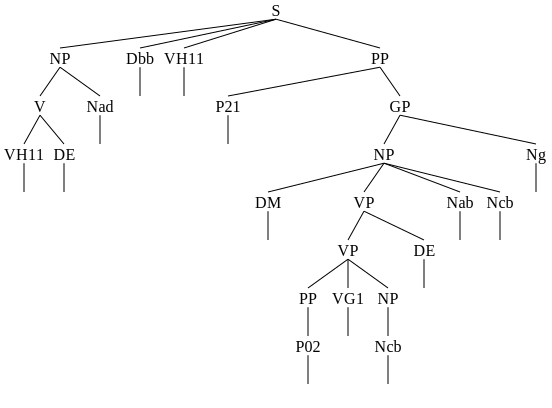

In [ ]:
# Deeply embedded passive construction 
from nltk.tree import *

tree = Tree.fromstring('(S \
    (NP (V‧的 (VH11 這樣) (DE 地)) (Nad 真理)) \
    (Dbb 也) \
    (VH11 應驗) \
    (PP \
      (P21 在) \
      (GP \
        (NP \
          (DM 每一座) \
          (VP‧的 (VP (PP (P02 被)) (VG1 列為) (NP (Ncb 觀光區))) (DE 的)) \
          (Nab 原住民) \
          (Ncb 部落)) \
        (Ng 上))))')

display(tree)

In [ ]:
# General function to extract verb from passive or causative construction

def extract_verb(tree, sent_index, target, verbs_dict):

    for index, subtree in enumerate(tree):
        # Base case
        if isinstance(subtree, str):
            return
        if subtree.label() == 'PP' and subtree[0][0] == target:
            try:
                while 'V' not in tree[index].label():
                    index += 1
                V = tree[index].leaves()
                # Exclude verb contained in multi-verb cluster
                if len(V) == 1:
                    verbs_dict[sent_index].extend(V)
                    print(V)
                return
            except: # Ill-formed structure: PP headed by target does not have a verb cluster sister
                print(sent_index)
                # print(tree)
                # display(tree)
                return
        # Recurse down the tree to find deeply embedded passive or causative construction
        extract_verb(subtree, sent_index, target, verbs_dict)

def process_sents(target, verbs_dict):
    for sent_index, sent in enumerate(sinica_treebank.sents()):
        if target in sent:
            tree = sinica_treebank.parsed_sents()[sent_index]
            verbs_dict[sent_index] = []
            extract_verb(tree, sent_index, target, verbs_dict)

In [ ]:
target, verbs_in_passives = '被', {}
process_sents(target, verbs_in_passives)

3460
(VP
  (Dd 才)
  (VK1 知道)
  (S
    (NP (Nhab 自己))
    (PP (P02 被) (NP (Nab 人)))
    (V‧地 (VH11 牢牢) (DE 的))
    (VB12 綁起來)
    (Ta 了)))


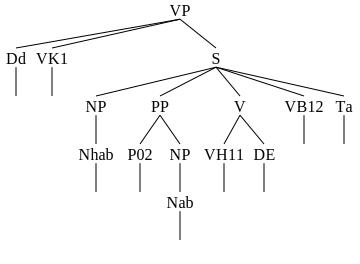

6779
(S
  (GP (NP (Ndabf 季)) (Ng 後))
  (PP (P02 被) (NP (Nba 波特蘭)))
  (VP (VC31 外加) (NP (N‧的 (Ndaba 明年) (DE 的)) (DM 第一輪) (Nac 選人權)))
  (VC2 換來)
  (NP (Nba 安奇)))


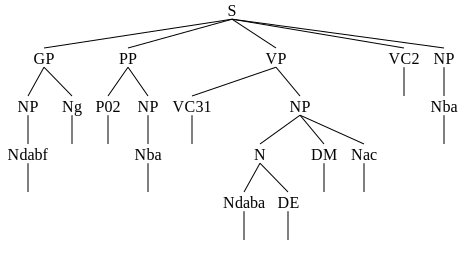

7277
(S
  (Cbaa 除非)
  (NP
    (S‧的
      (S
        (NP (Nca 伊拉克))
        (VC31 製造)
        (NP (N (Nad 化學) (Caa 和) (Nab 核子)) (Nab 武器)))
      (DE 的))
    (Nad 能力))
  (NP (P02 被))
  (VC2 摧毀))


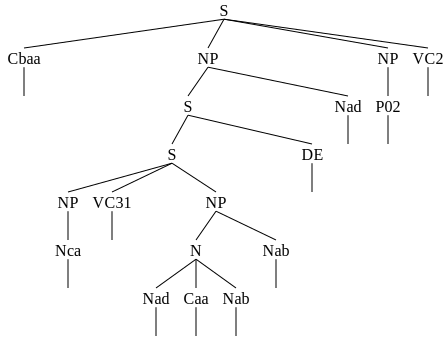

8038
(S
  (NP (N‧的 (Nac 生命) (DE 的)) (Nad 表面))
  (Ncda 哪)
  (V_2 有)
  (NP
    (VP‧的
      (VP (Dc 不) (Dd 曾) (PP (P02 被)) (VH11 (VH11 破損) (VH11 殘缺)))
      (DE 的))))


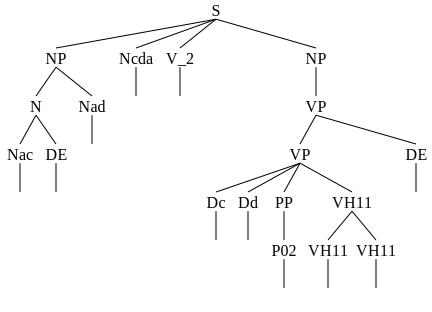

9147
(S
  (NP (Nca 望安))
  (V_11 是)
  (NP
    (Nca 台灣)
    (Neqa 少數)
    (S‧的 (S (Dc 未) (PP (P02 被)) (VC2 (VC2 污染) (VC2 破壞))) (DE 的))
    (Nab 綠蠵龜)
    (Ncb 產卵地)))


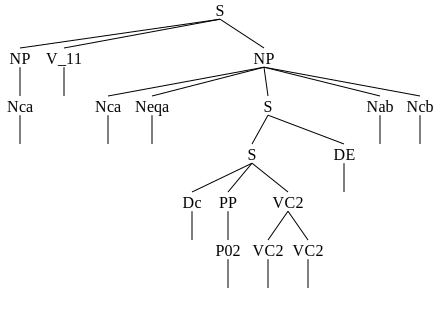

9188
(S
  (NP (Nca 台灣))
  (Dbb 還)
  (V_2 有)
  (NP (DM‧的 (DM 成千種) (DE 的)) (Naeb 蛾類))
  (VP
    (PP (P21 在) (NP (Nab 自然) (Ncda 裡)))
    (Dc 未)
    (PP (P02 被))
    (V (VC2 分類) (Caa 、) (VG1 訂名))))


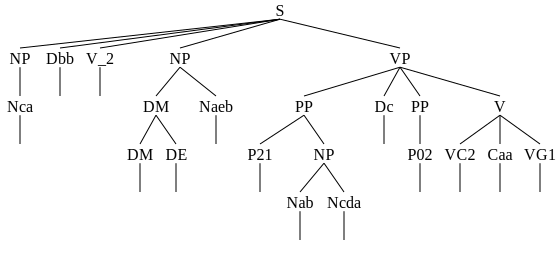

9272
(NP
  (VP‧的
    (VP
      (NP (VH11 小小) (Nad 年紀))
      (Dd 就)
      (VK1 懂得)
      (VP (PP (P37 替) (NP (Nab 父親) (Nab 涼蓆))) (VH16 溫) (NP (Nab 被))))
    (DE 的))
  (Nba 黃香))


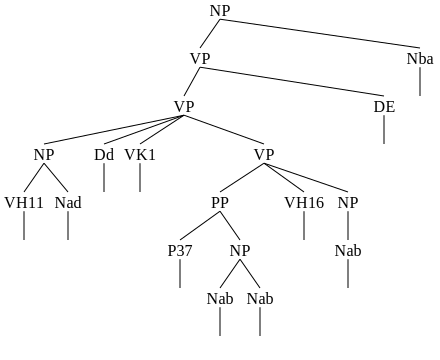

In [ ]:
# Inspect constructions containing '被' where the verb is not extracted
for sent_index, verb in verbs_in_passives.items():
    if not verb:
        tree = sinica_treebank.parsed_sents()[sent_index]
        print(sent_index)
        print(tree)
        display(tree)

In [ ]:
target, verbs_in_causatives = '把', {}
process_sents(target, verbs_in_causatives)

1388
(PP (P07 把) (NP (V‧的 (VE2 觀察) (DE 的)) (Nac 結果)))


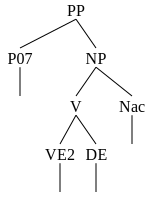

2547
(VP (Dbb 不由得) (PP (P07 把) (NP (Nab 身子))) (VP (VC2 伸) (Di 一) (VC2 伸)))


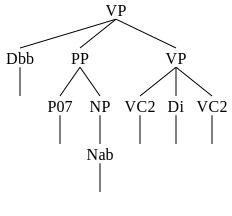

4012
(S
  (NP (Nhaa 他))
  (PP (P07 把) (NP (NP‧的 (NP (VH13 大) (Nab 榕樹)) (DE 的)) (Naa 鬍子)))
  (DM‧地 (DM (DM 一根) (DM 一根)) (DE 的))
  (VP (VC2 數) (Di 著))
  (VC2 玩))


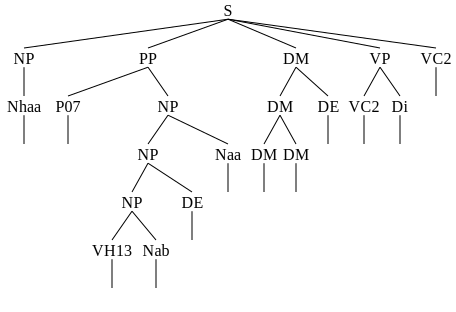

4131
(S
  (NP (Nhaa 他))
  (PP (P07 把) (NP (Nab 書)))
  (VC2 (VC2 翻) (Di 了) (VC2 翻)))


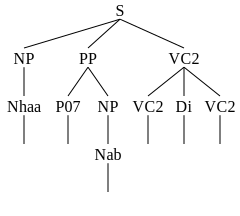

4317
(PP
  (P07 把)
  (NP
    (S‧的
      (S (NP (Nhaa 他們)) (PP (P21 在) (NP (Nab 月球) (Ncda 上))) (VA4 活動))
      (DE 的))
    (Nac 情形)))


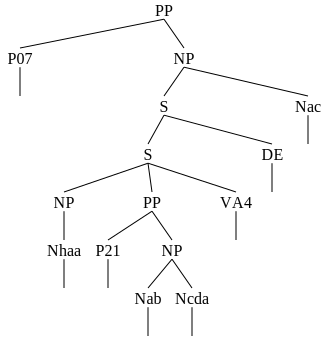

4460
(PP
  (P07 把)
  (NP
    (NP
      (NP (Nac (Nac 國語) (Caa 、) (Nac 社會)))
      (Caa 、)
      (NP (Nad 自然) (Nad 科學)))
    (Caa 、)
    (NP (Nad 數學))))


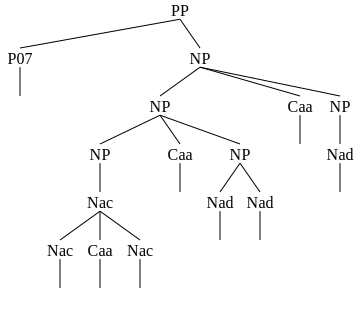

4468
(VP
  (Dbb 就)
  (PP (P07 把) (NP (Nhaa 它)))
  (VP (VP (VC2 裁) (Di 過)) (Caa 、) (VP (VC2 縫) (Di 過))))


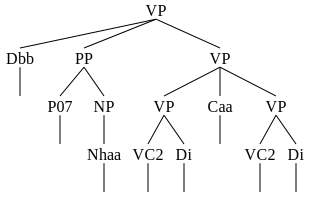

4470
(S
  (NP (N‧的 (Nad 堆棧式) (DE 的)) (Nab 頭腦))
  (V_11 是)
  (S (PP (P07 把) (NP (Nac 知識))) (V‧地 (VH11 原封不動) (DE 的)) (VB12 堆起來)))


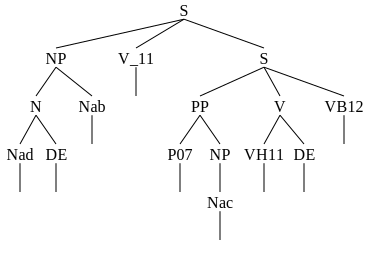

4471
(S
  (NP (N‧的 (Nad 工廠式) (DE 的)) (Nab 頭腦))
  (Dbb 卻)
  (Dbab 要)
  (PP (P07 把) (NP (Nac 知識)))
  (V (VH16 融化) (Caa 、) (VC2 應用)))


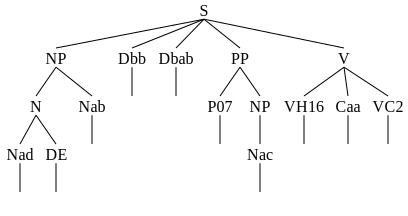

4524
(VP
  (VF2 請)
  (VP (Dd 先) (PP (P07 把) (NP (DM 十五座) (Nab 城池))))
  (VD1 交給)
  (NP (Nhac 敝國)))


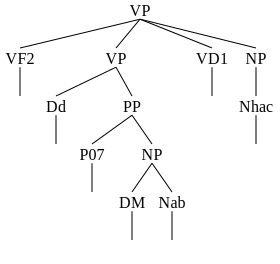

4816
(VP
  (NP (P07 把) (NP (Naeb 軍火)))
  (V‧地 (VH11 順利) (DE 的))
  (VB2 運進)
  (NP (Nab 城) (Ncda 裡)))


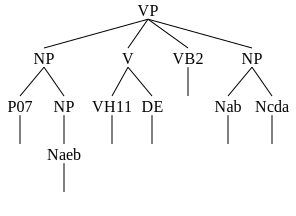

5038
(PP
  (P07 把)
  (GP
    (VP (NP (Nhab 自己) (A‧的 (A 分內) (DE 的)) (Nac 工作)) (VC2 做好) (Di 了))
    (Ng 以後)))


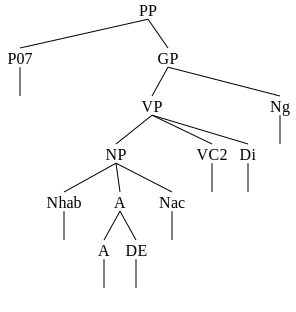

5064
(S
  (Dd 先)
  (PP (P07 把) (NP (N‧的 (Neqa 一堆堆) (DE 的)) (Nab 穀子)))
  (VB11 (VB11 攪散) (Caa 、) (VB11 攤平)))


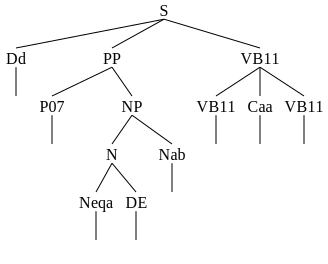

5162
(VP
  (Dd 先)
  (Dbab 要)
  (NP (P07 把) (NP (Nab 種子)))
  (VC31 撒播)
  (PP (P21 在) (NP (Naa 泥土) (Ncda 裡))))


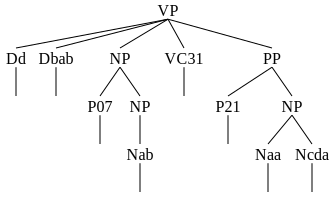

5506
(PP
  (P07 把)
  (NP (Nhaa 他) (V‧的 (VC2 (VC2 躬行) (VC2 實踐)) (DE 的)) (Nac 學說)))


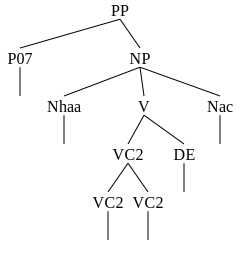

6054
(VP
  (VG2 乃)
  (NP
    (S‧的
      (S
        (NP (Nba (Nba 郝柏村) (Caa 與) (Nba 國民黨)))
        (VC2 偷)
        (NP (Nab 雞))
        (VP (Dc 不) (VC2 著))
        (VP (VC2 蝕) (NP (DM 把) (Nab 米))))
      (DE 的))
    (Nac 後果)))


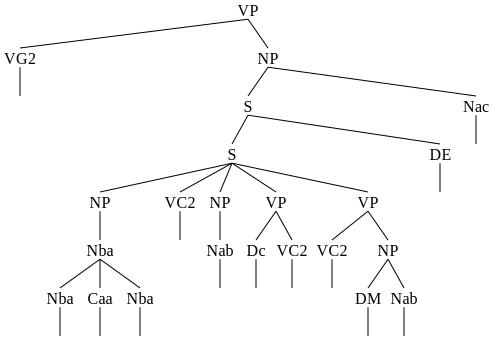

8089
(S
  (NP (Nep 這))
  (Dc 不)
  (V_11 是)
  (PP
    (P07 把)
    (NP
      (DM 一個)
      (V‧的 (VH11 簡單) (DE 的))
      (S‧的 (S (NP (Nab 總統)) (Dbab 要不要) (VH11 直接) (VH11 民選)) (DE 的))
      (Nac 問題))))


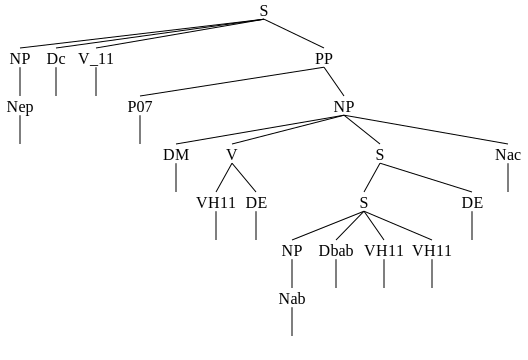

8656
(PP
  (P07 把)
  (NP
    (NP‧的
      (NP
        (NP
          (VP‧的 (VP (VC1 經過) (NP (Nad 歷史) (Nac 考驗))) (DE 的))
          (Neqa 一些)
          (VH11 傳統)
          (Nad 醫學))
        (Ncda 裡))
      (DE 的))
    (Nad 精華)))


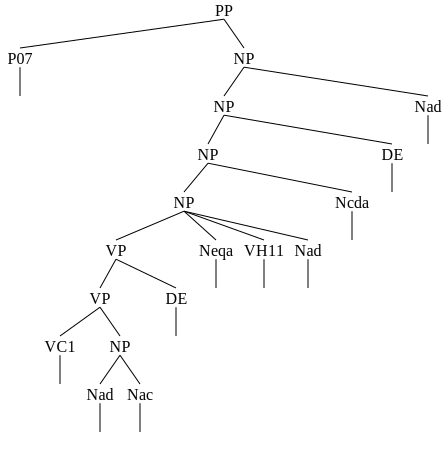

9311
(VP
  (Dbb 也)
  (Dd 就)
  (V_11 是)
  (S
    (PP
      (P07 把)
      (NP (N‧的 (Nad 道德) (DE 的)) (N (Nad 內容) (Caa 與) (Nac 典範))))
    (VP‧地 (VP (PP (P55 像) (NP (Nac 知識))) (VH11 一樣)) (DE 的))
    (VD1 灌輸)
    (PP (P61 到) (NP (NP (Nab 學生) (Nab 腦袋)) (Ncda 裡)))))


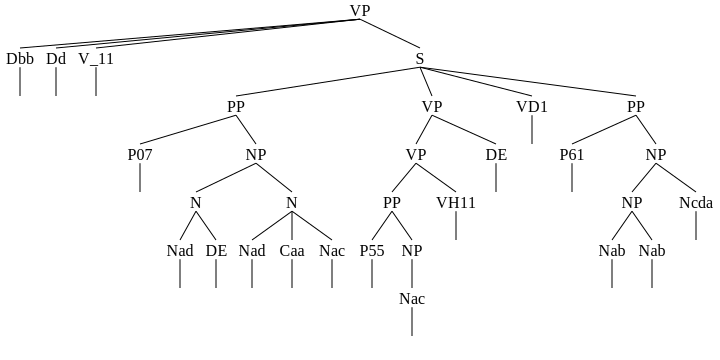

In [ ]:
# Inspect constructions containing '把' where the verb is not extracted
for sent_index, verb in verbs_in_causatives.items():
    if not verb:
        tree = sinica_treebank.parsed_sents()[sent_index]
        print(sent_index)
        print(tree)
        display(tree)

In [ ]:
verbs_in_passives_list = [V for V_list in verbs_in_passives.values() for V in V_list]
verbs_in_causatives_list = [V for V_list in verbs_in_causatives.values() for V in V_list]

print('In both passives and causatives: ', set(verbs_in_passives_list) & set(verbs_in_causatives_list)) 
print('Only in passives: ', set(verbs_in_passives_list) - set(verbs_in_causatives_list)) 
print('Only in causatives: ', set(verbs_in_causatives_list) - set(verbs_in_passives_list)) 

In both passives and causatives:  {'送給', '殺', '視為', '送', '沖', '砸到', '送進', '當成', '當作', '遮', '吹', '捉住'}
Only in passives:  {'縱容', '咬住', '封', '磨', '棄置', '痛恨', '吹走', '處以', '稱為', '破壞', '停止', '通緝', '誘發', '壓', '指定為', '啟蒙', '發掘', '留置', '掏空', '吞噬', '揭發開', '疏略', '關入', '奉為', '補', '形容為', '套牢', '擬', '否決', '派往', '繼承', '忽視', '網住', '選進', '治癒', '捕', '拘束', '壓住', '排除', '派到', '攔阻', '阻塞', '聘', '掌控', '鄙棄', '騙', '戴上', '攻擊', '淘汰', '暗殺', '坑', '灌上', '選入', '選作', '比上去', '宣告', '挑戰', '撞倒', '推送', '留置為', '污染', '晒昏', '拆除', '公認為', '洞悉', '發現', '綁', '銷毀', '糟蹋掉', '解釋為', '打溼', '發明', '取笑', '推行', '搶劫', '說服', '打敗', '比下來', '問到', '提上', '選派', '支持', '撞傷', '提前', '列為', '拒絕', '罷黜', '定為', '選', '消滅', '稱呼', '送上', '了解', '解聘', '分派', '引進', '擊出', '割傷', '籠罩', '輸送', '圍繞', '沖走', '砍下來', '遣送', '解除', '擴大', '感動', '摑', '瓦解', '詢及', '壓迫', '製造出來', '毆', '經營出', '聽', '知道', '炸傷', '賦予', '槍斃', '謀殺', '接受', '分歧', '混淆', '拍成', '叮嚀', '漂到', '指稱', '取代', '建議', '破解'}
Only in causatives:  {'打落', '嚇', '弄髒', '說了出來', '搧', '染藍', '收拾好', '染黃', '攪亂', '搬回', '遺棄', '磨成', '弄溼'

# SpaCy

* The verb in a passive or causative construction is the ancestor of '被' or '把' in the dependency graph.

* When a passive or causative construction is deeply embedded, '被' or '把' has multiple ancestors; the verb is the first ancestor in the ancestors list.

In [ ]:
! git clone https://github.com/FulangChen/Extract-Verbs-in-Mandarin-Passives-and-Causatives

In [ ]:
!pip install -U spacy
!python -m spacy download zh_core_web_lg # https://spacy.io/models/zh

import zh_core_web_lg
nlp = zh_core_web_lg.load()

In [ ]:
from spacy import displacy

In [ ]:
sent = nlp('老人被大福的孝心感动')
for token in sent:
    print(token.text, token.pos_, token.dep_, list(token.ancestors))

displacy.render(sent, style='dep', jupyter=True)

老人 NOUN nsubjpass [感动]
被 X auxpass [感动]
大福 PROPN nmod:assmod [孝心, 感动]
的 PART case [大福, 孝心, 感动]
孝心 NOUN nsubj [感动]
感动 VERB ROOT []


In [ ]:
sent = nlp('这种情景把我吓坏了')
for token in sent:
    print(token.text, token.pos_, token.dep_, list(token.ancestors))

displacy.render(sent, style='dep', jupyter=True)

这种 NUM dep [情景, 吓坏]
情景 NOUN nsubj [吓坏]
把 X aux:ba [吓坏]
我 PRON dep [吓坏]
吓坏 VERB ROOT []
了 PART aux:asp [吓坏]


In [ ]:
sent = nlp('这样的真理也应验在每一座被列为观光区的原住民部落上')
for token in sent:
    print(token.text, token.pos_, token.dep_, list(token.ancestors))

displacy.render(sent, style='dep', jupyter=True)

这样 ADJ amod [真理, 应验]
的 PART case [这样, 真理, 应验]
真理 NOUN nsubj [应验]
也 ADV advmod [应验]
应验 VERB ROOT []
在 ADP case [部落, 应验]
每 DET det [部落, 应验]
一 NUM dep [每, 部落, 应验]
座 NUM mark:clf [一, 每, 部落, 应验]
被 X auxpass [列为, 部落, 应验]
列为 VERB acl [部落, 应验]
观光区 NOUN nmod:assmod [部落, 应验]
的 PART case [观光区, 部落, 应验]
原住民 NOUN compound:nn [部落, 应验]
部落 NOUN nmod:prep [应验]
上 PART case [部落, 应验]


In [ ]:
bei_sents = open('/content/Extract-Verbs-in-Mandarin-Passives-and-Causatives/bei.txt', 'r')
verbs_in_passives = open('verbs_in_passives.txt', 'w')

for sent in bei_sents:
    sent = nlp(sent)
    for token in sent:
        if token.text == '被' and token.dep_ == 'auxpass' and list(token.ancestors):
            ancestor = list(token.ancestors)[0]
            if ancestor.pos_ == 'VERB':
                verbs_in_passives.write(ancestor.text + '\n')

bei_sents.close()
verbs_in_passives.close()

In [ ]:
ba_sents = open('/content/Extract-Verbs-in-Mandarin-Passives-and-Causatives/ba.txt', 'r')
verbs_in_causatives = open('verbs_in_causatives.txt', 'w')

for sent in ba_sents:
    sent = nlp(sent)
    for token in sent:
        if token.text == '把' and token.dep_ == 'aux:ba' and list(token.ancestors):
            ancestor = list(token.ancestors)[0]
            if ancestor.pos_ == 'VERB':
                verbs_in_causatives.write(ancestor.text + '\n')

ba_sents.close()
verbs_in_causatives.close()

In [ ]:
verbs_in_passives = open('verbs_in_passives.txt', 'r')
verbs_in_causatives = open('verbs_in_causatives.txt', 'r')

verbs_dict = {} # V: [freq_passive, freq_causative]

for verb in verbs_in_passives:
    verb = verb.strip()
    verbs_dict.setdefault(verb, [0, 0])
    verbs_dict[verb][0] += 1

for verb in verbs_in_causatives:
    verb = verb.strip()
    verbs_dict.setdefault(verb, [0, 0])
    verbs_dict[verb][1] += 1

verbs_in_passives.close()
verbs_in_causatives.close()

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(verbs_dict, orient = 'index', columns = ['Passive', 'Causative'])
df = df.sort_values(['Passive', 'Causative'], ascending = [False, False])
df.to_csv('verb_pass_caus_freq.csv')

df.head(20)

,Passive,Causative
称为,17191,694
认为,11063,69
视为,5383,470
列为,4530,275
发现,4087,16
选为,3683,14
任命,3662,4
誉为,2880,7
称作,2712,176
评为,2681,47
